In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
import sklearn
sklearn.__version__
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from IPython.display import display_html

import sklearn


### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 
path_train = pd.read_csv('train.csv')
path_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,5
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,7
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,4
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,5
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,8
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7


## Работа с данными 


In [5]:
path_train['Class'] = path_train['quality'].apply(lambda x: 1 if x > 6   else 0)
path_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,5,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,7,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,4,0
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,5,0
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,8,1
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7,1


In [6]:
path_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,6.821797,0.283849,0.332545,5.725652,0.044460,34.615072,135.248116,0.993532,3.201449,0.492394,10.734348,6.004638,0.358261
std,0.853886,0.106090,0.122279,4.570812,0.021236,16.751535,42.848854,0.002830,0.151395,0.121452,1.272796,1.071667,0.479628
min,3.900000,0.085000,0.000000,0.600000,0.012000,3.000000,10.000000,0.987110,2.830000,0.220000,8.400000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.034000,23.000000,105.000000,0.991320,3.100000,0.400000,9.600000,5.000000,0.000000
50%,6.800000,0.270000,0.320000,4.600000,0.041000,33.000000,130.000000,0.993200,3.190000,0.480000,10.600000,6.000000,0.000000
75%,7.300000,0.330000,0.380000,8.700000,0.049000,45.000000,164.000000,0.995500,3.300000,0.560000,11.700000,7.000000,1.000000
max,11.800000,1.100000,1.660000,20.700000,0.290000,124.000000,366.500000,1.001820,3.820000,1.080000,14.200000,9.000000,1.000000


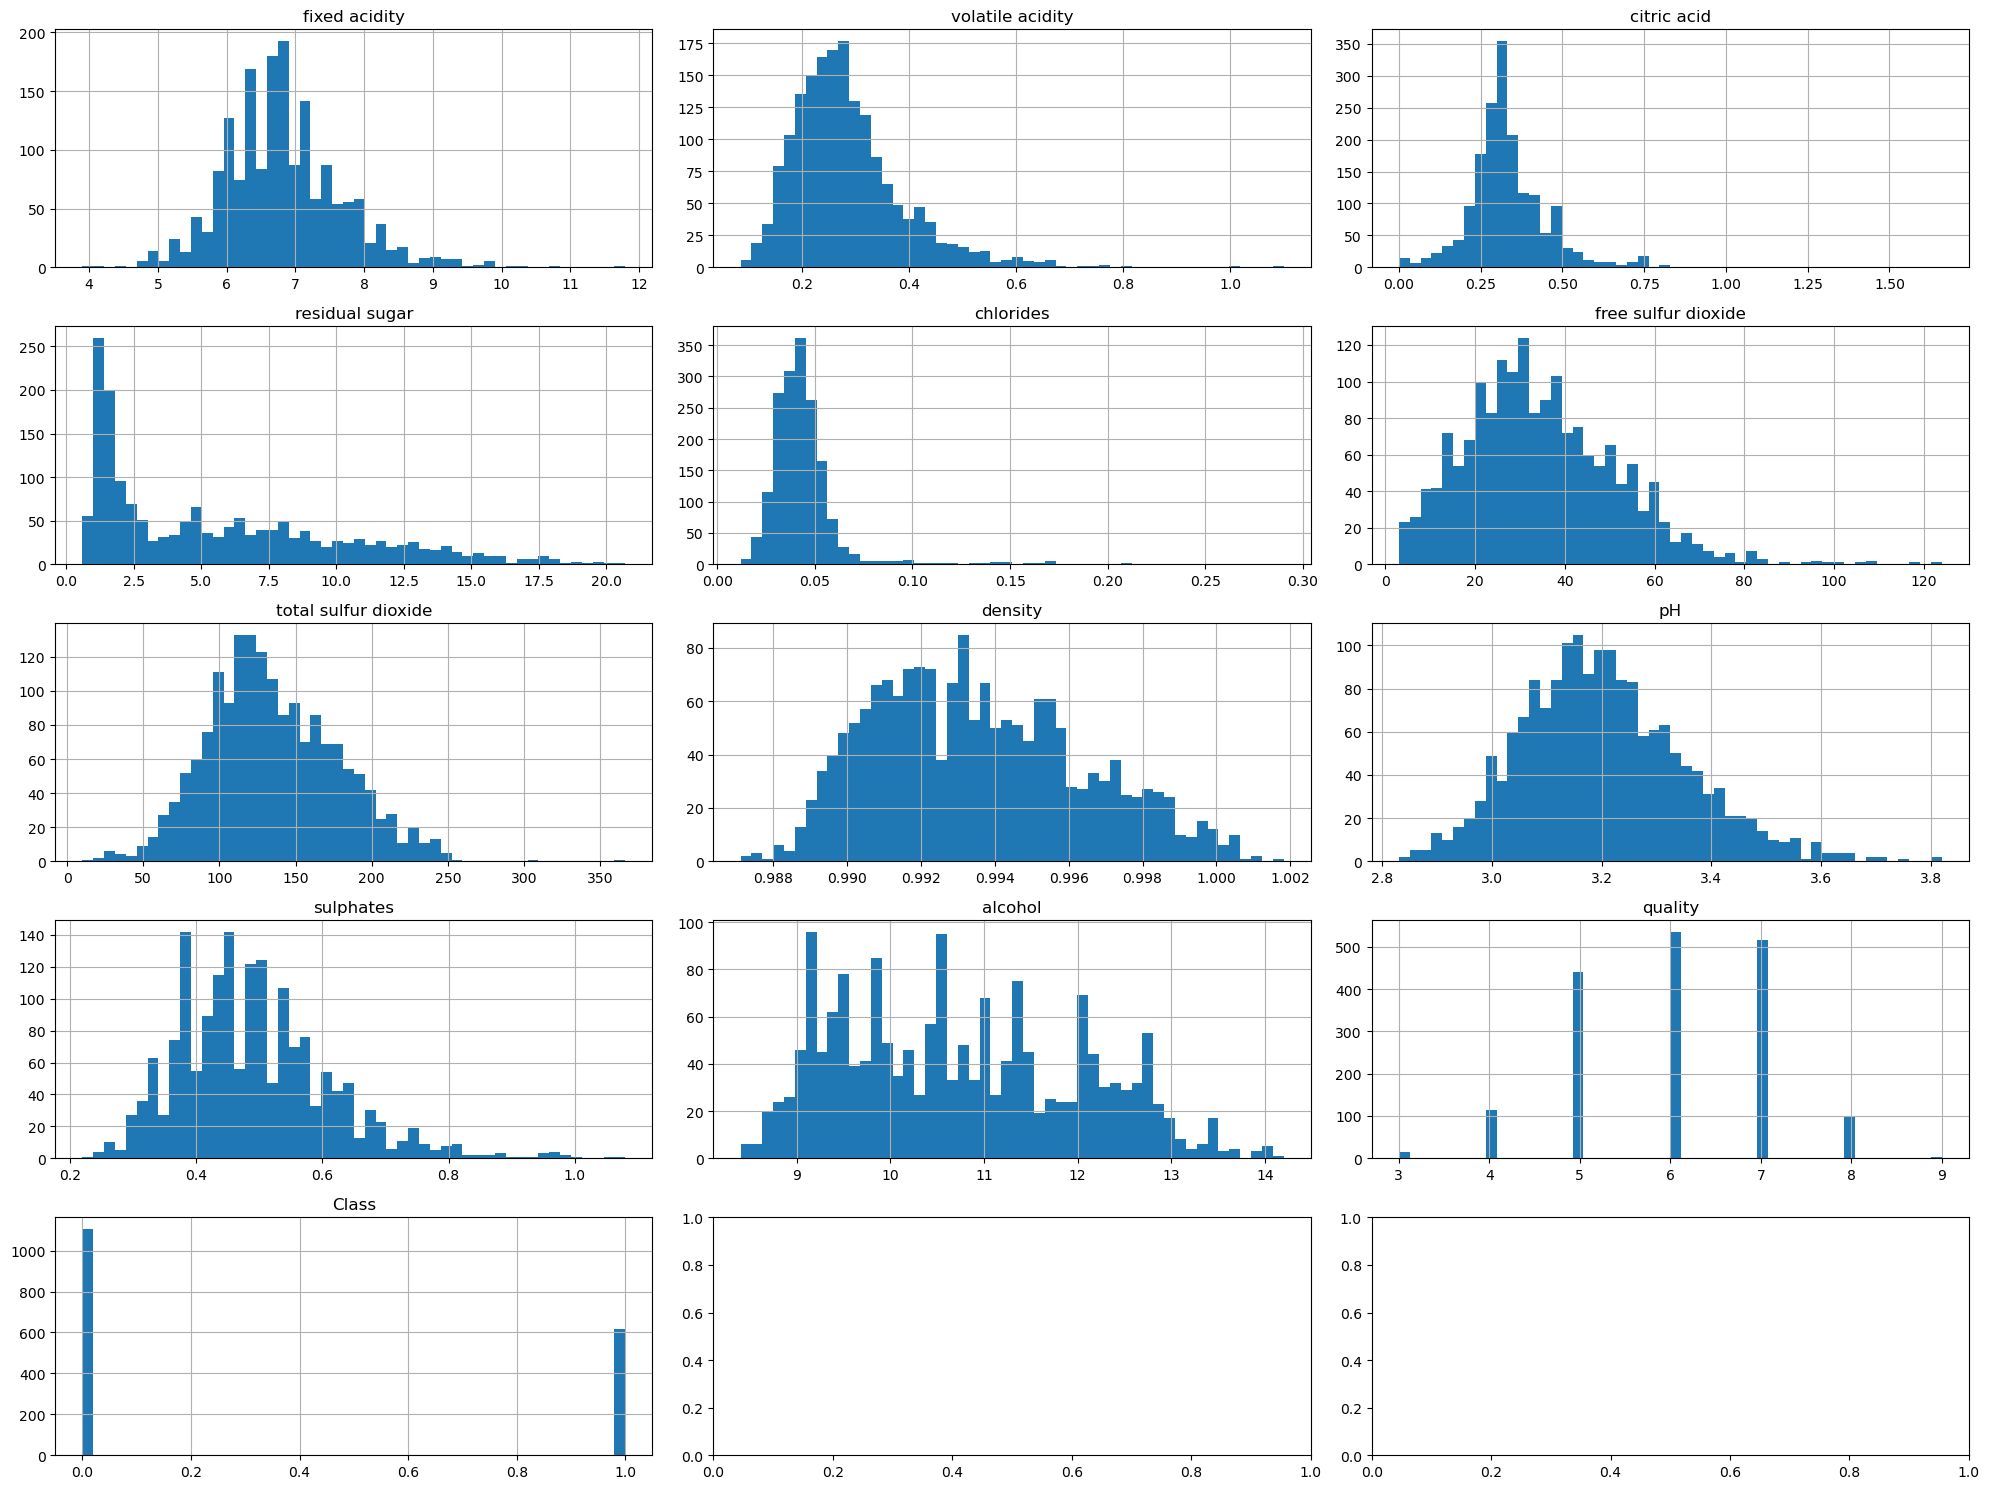

In [7]:
dff = path_train
fig, ax = plt.subplots(nrows=(len(dff.columns) - 1) // 3 + 1, ncols=3, figsize=(20, 15))
for i, col in enumerate(dff.columns):
    if pd.api.types.is_numeric_dtype(dff[col]):
        bins = 55
        dff[col].hist(ax=ax[i // 3, i % 3], bins = 50)
        ax[i // 3, i % 3].set_title(col)
    else:
        ax[i // 3, i % 3].axis('off')
plt.tight_layout()
plt.show()

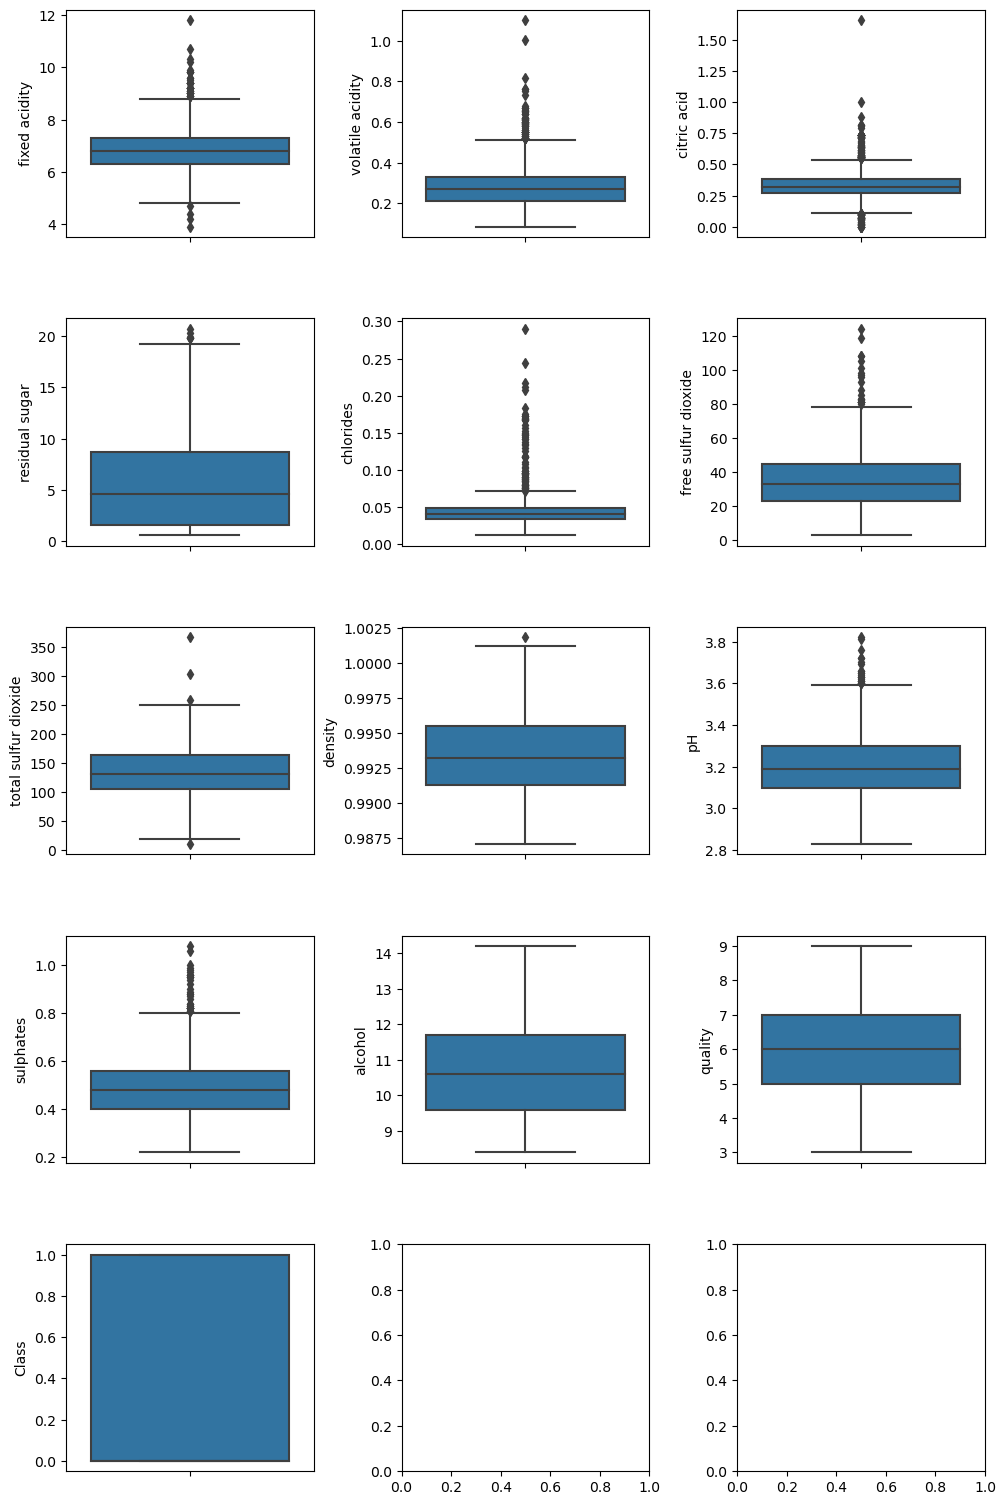

In [8]:
fig, ax = plt.subplots(ncols=3, nrows = 5, figsize = (10,15))
index = 0
ax = ax.flatten()

for col, value in path_train.items():
    if col != 'type':
        sns.boxplot(y = col, data = path_train, ax = ax[index])
        index +=1
plt.tight_layout(pad =0.5, w_pad = 0.7, h_pad = 5.0)

In [9]:
path_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1725 non-null   float64
 1   volatile acidity      1725 non-null   float64
 2   citric acid           1725 non-null   float64
 3   residual sugar        1725 non-null   float64
 4   chlorides             1725 non-null   float64
 5   free sulfur dioxide   1725 non-null   float64
 6   total sulfur dioxide  1725 non-null   float64
 7   density               1725 non-null   float64
 8   pH                    1725 non-null   float64
 9   sulphates             1725 non-null   float64
 10  alcohol               1725 non-null   float64
 11  quality               1725 non-null   int64  
 12  Class                 1725 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 175.3 KB


In [10]:
path_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Class                   0
dtype: int64

In [11]:
duplicateRows = path_train[path_train.duplicated ()]
duplicateRows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class


In [12]:
# удалял столбцы с сильной корреляцией, однако к улучшению результатов это не привело 
cor = path_train.corr()
cor.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
fixed acidity,1.000000,-0.019249,0.308119,0.110090,0.046589,-0.071502,0.090890,0.298510,-0.428505,-0.027443,-0.136929,-0.164886,-0.107102
volatile acidity,-0.019249,1.000000,-0.193696,0.097584,0.098649,-0.117890,0.100351,0.044907,-0.054374,-0.070820,0.036713,-0.224332,-0.114323
citric acid,0.308119,-0.193696,1.000000,0.088621,0.118834,0.110299,0.123885,0.139801,-0.151155,0.045080,-0.050179,0.022927,-0.012093
residual sugar,0.110090,0.097584,0.088621,1.000000,0.096714,0.321649,0.438185,0.798569,-0.166196,-0.030785,-0.404295,-0.140981,-0.173013
chlorides,0.046589,0.098649,0.118834,0.096714,1.000000,0.101924,0.222393,0.306691,-0.090465,0.042989,-0.404737,-0.275969,-0.251774
free sulfur dioxide,-0.071502,-0.117890,0.110299,0.321649,0.101924,1.000000,0.605713,0.304056,0.012516,0.084226,-0.237443,0.057952,-0.018562
total sulfur dioxide,0.090890,0.100351,0.123885,0.438185,0.222393,0.605713,1.000000,0.562273,0.014276,0.152732,-0.439156,-0.187903,-0.224757
density,0.298510,0.044907,0.139801,0.798569,0.306691,0.304056,0.562273,1.000000,-0.056469,0.080527,-0.802832,-0.392913,-0.388812
pH,-0.428505,-0.054374,-0.151155,-0.166196,-0.090465,0.012516,0.014276,-0.056469,1.000000,0.168643,0.075596,0.171493,0.135993
sulphates,-0.027443,-0.070820,0.045080,-0.030785,0.042989,0.084226,0.152732,0.080527,0.168643,1.000000,-0.026955,0.064579,0.051285


In [13]:
def replace(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

In [14]:
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


In [15]:
#replace_outliers_with_bounds(path_train,'chlorides')
#replace(path_train,'citric acid')
#replace(path_train,'volatile acidity')
#outliers(path_train, 'citric acid')
#outliers(path_train, 'chlorides')


In [16]:
X = path_train.drop(columns = ['quality','Class'], axis=1)
y = path_train['Class']
display(X.head())
display(y.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4


0    1
1    1
2    0
3    1
4    0
Name: Class, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
display('X_train', X_train.shape)
display('y_train', y_train.shape)
display('X_test', X_test.shape)
display('y_test', y_test.shape)

'X_train'

(1207, 11)

'y_train'

(1207,)

'X_test'

(518, 11)

'y_test'

(518,)

## Метод ближайших соседей

In [18]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    KNeighborsRegressor())])
kfold = KFold(n_splits=10, shuffle=True)

p = np.arange(1,15)
weights = ['uniform','distance']
n_neighbors = np.arange(1,10)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler() ]
param_grid =[
    {'preprocessing': scaling, 
     'regressor': [KNeighborsRegressor()],
         'regressor__n_neighbors': n_neighbors,
         'regressor__p': p,
         'regressor__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid=[{'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()],
                          'regressor': [KNeighborsRegressor(n_neighbors=9, p=6,
                                                            weights='distance')],
                          'regressor__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'regressor__p': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                          'regressor__weights': ['uniform', 'distance']}],
             return_train_score=True)

In [19]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,487,479,491,481,483,729,237,489,227,485,...,8,9,524,525,10,11,510,511,0,1
mean_fit_time,0.003696,0.003855,0.003789,0.003694,0.003773,0.006115,0.003752,0.003777,0.003746,0.003773,...,0.003582,0.003556,0.005429,0.005779,0.003499,0.00342,0.005536,0.005814,0.004113,0.003656
std_fit_time,0.00033,0.000456,0.000322,0.000257,0.000342,0.000461,0.000208,0.000327,0.000368,0.000513,...,0.000172,0.000245,0.000424,0.000367,0.000313,0.000212,0.000199,0.000267,0.000506,0.000312
mean_score_time,0.025447,0.005057,0.024191,0.028622,0.025941,0.005314,0.019897,0.024527,0.00468,0.025382,...,0.011714,0.011525,0.010944,0.011717,0.01116,0.011281,0.013112,0.013443,0.004556,0.004263
std_score_time,0.001671,0.000428,0.001913,0.00094,0.001273,0.000367,0.001567,0.001957,0.000427,0.002395,...,0.000972,0.000694,0.000819,0.00091,0.000836,0.001094,0.000897,0.000593,0.000344,0.000403
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),...,MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler()
param_regressor,"KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...",...,"KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight...","KNeighborsRegressor(n_neighbors=9, p=6, weight..."
param_regressor__n_neighbors,9,9,9,9,9,9,9,9,9,9,...,1,1,1,1,1,1,1,1,1,1
param_regressor__p,6,2,8,3,4,1,7,7,2,5,...,5,5,11,11,6,6,4,4,1,1
param_regressor__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': StandardScaler(), 'regressor...",...,"{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':..."


In [20]:
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('regressor',
                 KNeighborsRegressor(n_neighbors=9, p=6, weights='distance'))])

In [21]:
knk_final = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier(n_neighbors=9, p=8))
])
knk_final.fit(X_train,y_train)

y_pred = knk_final.predict(X_test)

print('Оценка на тренировочном наборе: ', knk_final.score(X_train,y_train))
print('Оценка на тестовом наборе: ', knk_final.score(X_test,y_test))
print('recall:    ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('f1:        ', f1_score(y_test, y_pred))

Оценка на тренировочном наборе:  0.8077879038939519
Оценка на тестовом наборе:  0.747104247104247
recall:     0.6382978723404256
precision:  0.6557377049180327
f1:         0.6469002695417789


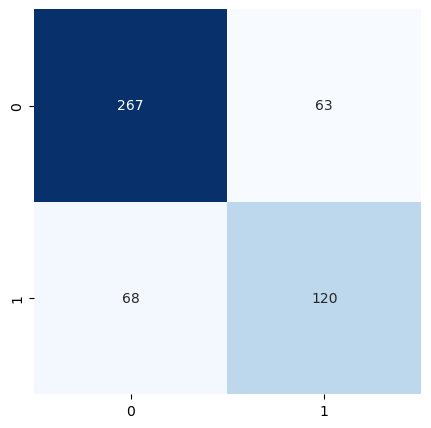

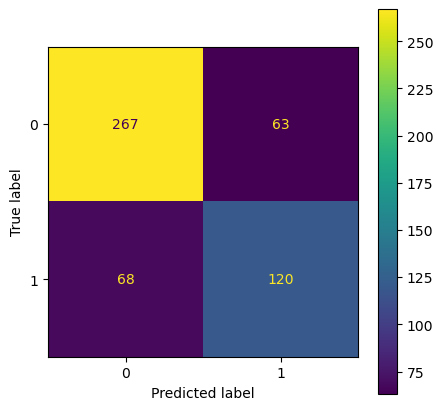

In [22]:
matrix_1 = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(matrix_1, annot=True, fmt='g', cbar=None, cmap="Blues");
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(5,5))

ConfusionMatrixDisplay(matrix_1).plot(ax = ax);

In [23]:
probas_knn = knk_final.predict_proba(X_test)
probas_knn

array([[1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.22222222, 0.77777778],
       ...,
       [0.88888889, 0.11111111],
       [0.55555556, 0.44444444],
       [0.66666667, 0.33333333]])

0.80000805931657


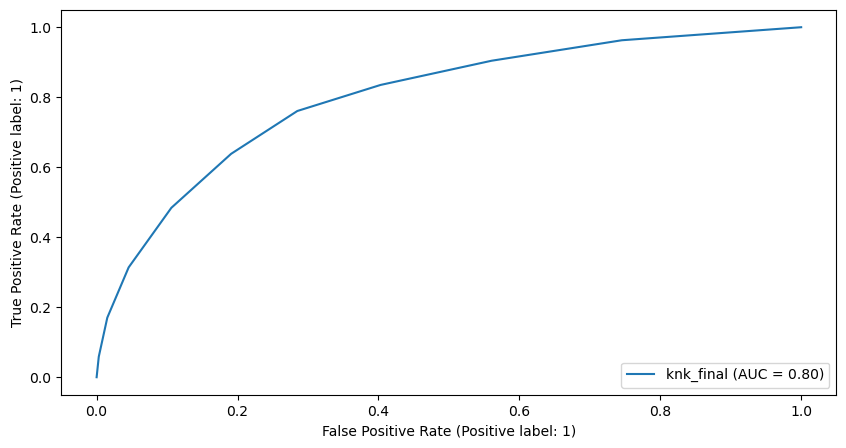

In [24]:
print(roc_auc_score(y_test, knk_final.predict_proba(X_test)[:,1]))
fig, ax_roc = plt.subplots(1,1, figsize=(10, 5))
RocCurveDisplay.from_estimator(knk_final, X_test, y_test, ax = ax_roc, name = 'knk_final');

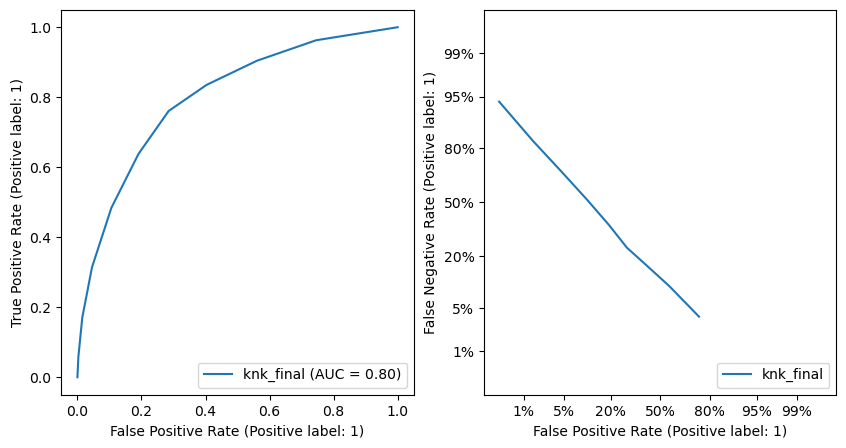

In [25]:
from sklearn.metrics import RocCurveDisplay, DetCurveDisplay
fig, [ax_roc, ax_det] = plt.subplots(1,2, figsize=(10, 5))
RocCurveDisplay.from_estimator(knk_final, X_test, y_test, ax = ax_roc, name = 'knk_final');
DetCurveDisplay.from_estimator(knk_final, X_test, y_test, ax = ax_det, name = 'knk_final');

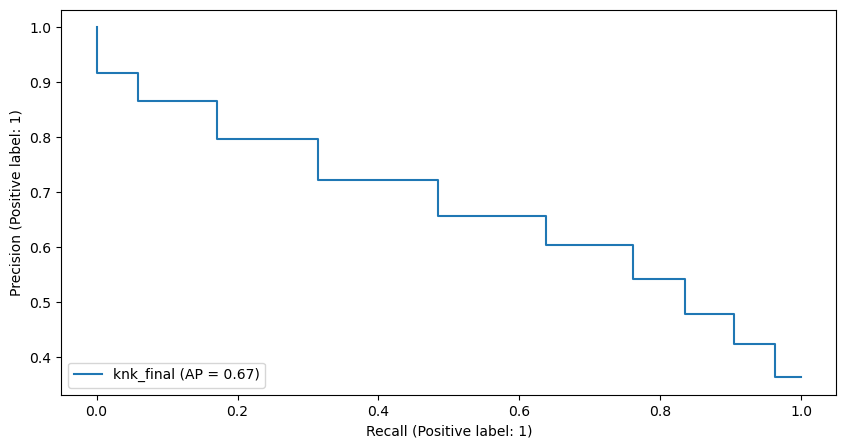

In [26]:
fig, ax_pr = plt.subplots(1,1, figsize=(10, 5))
PrecisionRecallDisplay.from_estimator(knk_final, X_test, y_test, ax = ax_pr, name = 'knk_final');

In [27]:
probas= knk_final.predict_proba(X_test)[:, 1]
def find_best_threshold(y_true, probas, metric_func):
    best_threshold = 0
    best_metric = 0
    
    thresholds = np.linspace(0, 1, 100)  
    for t in thresholds:
        predictions = (probas >= t).astype(int)  
        current_metric = metric_func(y_true, predictions)  
        
        if current_metric > best_metric:  
            best_metric = current_metric
            best_threshold = t
            
    return best_threshold, best_metric
best_threshold, best_precision = find_best_threshold(y_test, probas, precision_score)

print(f"Лучший порог: {best_threshold}, достигая точности: {best_precision}")

Лучший порог: 0.888888888888889, достигая точности: 0.9166666666666666


In [28]:
# на мой взгляд, мы должны использоватт метрику  precision, т.к. нам надо научиться отличать 1 класс вина
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
y_scores = knk_final.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
idx = np.where(recall >= 0.3)[0]
threshold_optimal = thresholds[idx[np.argmax(precision[idx])]]
print(f"Optimal threshold: {threshold_optimal}")
y_pred_optimal = np.where(y_scores >= threshold_optimal, 1, 0)

precision_final = precision_score(y_test, y_pred_optimal)
recall_final = recall_score(y_test, y_pred_optimal)

print(f"Final Precision: {precision_final}")
print(f"Final Recall: {recall_final}")

Optimal threshold: 0.7777777777777778
Final Precision: 0.7972972972972973
Final Recall: 0.31382978723404253


## Логистичекая регрессия

In [29]:
pipe_lg = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])
cv_lg = StratifiedShuffleSplit(test_size = 0.3, train_size = 0.6, n_splits = 5)
scaling_lg = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid_lg =[
    {'preprocessing': scaling_lg,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling_lg,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling_lg,'clf__penalty': [None], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid_lg = GridSearchCV(pipe_lg, param_grid_lg, cv = cv_lg, scoring='recall', return_train_score = True)
grid_lg.fit(X_train, y_train)
grid_lg   

/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': [None],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='recall')

In [30]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf', LogisticRegression())]) 

cv = StratifiedShuffleSplit(test_size=.3, train_size=.6, n_splits=5)
scaling = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]

C_range = np.arange(1, 100, 50)

param_grid =[
    {
        'preprocessing': scaling,
        'clf__penalty': ['l2'], 
        'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'clf__C': C_range
    },
    {
        'preprocessing': scaling,
        'clf__penalty': ['l1'], 
        'clf__solver': ['liblinear'],
        'clf__C': C_range
    },
    {
        'preprocessing': scaling,
        'clf__penalty': ['none'], 
        'clf__solver': ['lbfgs', 'newton-cg']
    }
]

grid_res = GridSearchCV(pipe, param_grid, cv=cv, scoring='precision', return_train_score=True)
grid_res.fit(X_train, y_train)
grid_res


/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/evgeniakonzafarova/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__C': array([ 1, 51]), 'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardSca...
                                            RobustScaler(), Normalizer()]},
                         {'clf__C': array([ 1, 51]), 'clf__penalty': ['l1'],
                          'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['none'],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='precision')

In [31]:
grid_result_lg = pd.DataFrame(grid_lg.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_lg

,21,22,1,5,9,13,17,2,6,10,...,4,12,16,27,23,11,3,7,15,19
mean_fit_time,0.008924,0.010747,0.008868,0.007196,0.004281,0.010893,0.015288,0.01121,0.009067,0.00643,...,0.008178,0.00633,0.005374,0.017962,0.013639,0.004486,0.007173,0.007989,0.005643,0.005805
std_fit_time,0.001321,0.000788,0.000559,0.000221,0.000132,0.001561,0.001082,0.000619,0.000579,0.00045,...,0.000478,0.000378,0.000187,0.00135,0.002703,0.000265,0.000333,0.000503,0.000444,0.000486
mean_score_time,0.002363,0.002542,0.002609,0.002618,0.002181,0.002365,0.002812,0.00266,0.002409,0.002373,...,0.002585,0.002416,0.002142,0.002796,0.002865,0.002513,0.002676,0.002489,0.002274,0.00231
std_score_time,0.000148,0.000228,0.000175,0.000134,0.000139,0.000284,0.000326,0.000147,0.000092,0.000158,...,0.000197,0.000199,0.000154,0.000221,0.000347,0.000094,0.000183,0.000178,0.000193,0.000172
param_clf__penalty,l1,l1,l2,l2,l2,l2,l2,l2,l2,l2,...,l2,l2,l2,None,l1,l2,l2,l2,l2,l2
param_clf__solver,liblinear,liblinear,newton-cg,lbfgs,liblinear,sag,saga,newton-cg,lbfgs,liblinear,...,lbfgs,sag,saga,lbfgs,liblinear,liblinear,newton-cg,lbfgs,sag,saga
param_preprocessing,StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...",...,"{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ..."
split0_test_score,0.612403,0.612403,0.612403,0.612403,0.612403,0.612403,0.612403,0.604651,0.604651,0.604651,...,0.527132,0.527132,0.527132,0.48062,0.054264,0.007752,0.007752,0.007752,0.007752,0.007752
split1_test_score,0.651163,0.643411,0.635659,0.635659,0.635659,0.635659,0.635659,0.635659,0.635659,0.635659,...,0.620155,0.620155,0.620155,0.550388,0.015504,0.007752,0.007752,0.007752,0.007752,0.007752


In [32]:
grid_re = pd.DataFrame(grid_res.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_re

,47,0,4,12,16,8,51,40,2,6,...,23,27,39,31,43,11,3,7,15,19
mean_fit_time,0.468145,0.009677,0.007778,0.006285,0.005806,0.004221,0.017794,0.018012,0.010814,0.008422,...,0.009494,0.012452,0.015411,0.004878,0.016097,0.003992,0.007366,0.008073,0.005614,0.005773
std_fit_time,0.224038,0.00063,0.000633,0.000491,0.000377,0.000248,0.000671,0.006829,0.000476,0.000536,...,0.00063,0.001157,0.001016,0.000203,0.001914,0.000449,0.000405,0.00037,0.000331,0.00038
mean_score_time,0.003224,0.002658,0.002401,0.002663,0.002334,0.002354,0.00257,0.002654,0.002375,0.002409,...,0.002528,0.002657,0.002843,0.002609,0.002794,0.002357,0.002575,0.002508,0.002283,0.002444
std_score_time,0.000359,0.000152,0.000067,0.000185,0.000309,0.000159,0.000111,0.000223,0.000147,0.000125,...,0.000223,0.000144,0.000167,0.000105,0.000123,0.000143,0.000179,0.000182,0.000125,0.000249
param_clf__C,51,1,1,1,1,1,NaN,1,1,1,...,51,51,51,51,1,1,1,1,1,1
param_clf__penalty,l1,l2,l2,l2,l2,l2,none,l1,l2,l2,...,l2,l2,l2,l2,l1,l2,l2,l2,l2,l2
param_clf__solver,liblinear,newton-cg,lbfgs,sag,saga,liblinear,lbfgs,liblinear,newton-cg,lbfgs,...,newton-cg,lbfgs,saga,liblinear,liblinear,liblinear,newton-cg,lbfgs,sag,saga
param_preprocessing,Normalizer(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),MinMaxScaler(),RobustScaler(),RobustScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__C': 51, 'clf__penalty': 'l1', 'clf__sol...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__C': 1, 'clf__penalty': 'l1', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...",...,"{'clf__C': 51, 'clf__penalty': 'l2', 'clf__sol...","{'clf__C': 51, 'clf__penalty': 'l2', 'clf__sol...","{'clf__C': 51, 'clf__penalty': 'l2', 'clf__sol...","{'clf__C': 51, 'clf__penalty': 'l2', 'clf__sol...","{'clf__C': 1, 'clf__penalty': 'l1', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...","{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv..."
split0_test_score,0.72043,0.694444,0.694444,0.694444,0.694444,0.688073,0.678899,0.6875,0.692308,0.692308,...,0.685714,0.685714,0.680556,0.691176,0.6,0.375,0.285714,0.285714,0.285714,0.285714


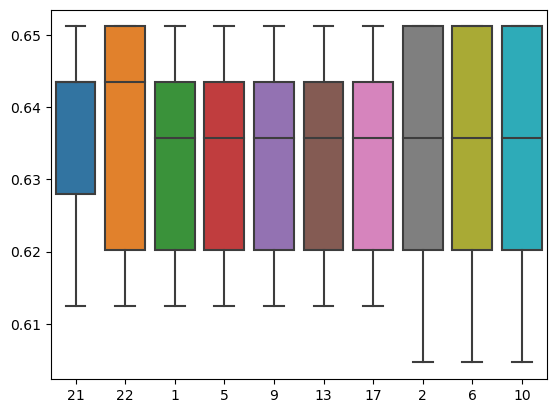

In [33]:
mask = grid_result_lg.index[grid_result_lg.index.str.endswith("_test_score")][:-3]
tabl = grid_result_lg.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

In [34]:
pipe_fin = make_pipeline(MinMaxScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2', C=1))
pipe_fin.fit(X_train,y_train)
y_1 = pipe_fin.predict(X_test)
print(classification_report(y_test, y_1))
pipe_fin.fit(X_train,y_train)
y_pred_lg = pipe_fin.predict(X_test)
print('recall:    ', recall_score(y_test, y_pred_lg))
print('precision: ', precision_score(y_test, y_pred_lg))
print('f1:        ', f1_score(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       330
           1       0.64      0.54      0.59       188

    accuracy                           0.72       518
   macro avg       0.70      0.68      0.69       518
weighted avg       0.72      0.72      0.72       518

recall:     0.5425531914893617
precision:  0.6415094339622641
f1:         0.5878962536023054


In [35]:
pipe_fin.fit(X_train, y_train) 
y_scores = pipe_fin.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)


idx = np.where(recall >= 0.15)[0]
threshold_optimal = thresholds[idx[np.argmax(precision[idx])]]
print(f"Optimal threshold: {threshold_optimal}")


y_pred_optimal = np.where(y_scores >= threshold_optimal, 1, 0)

precision_final = precision_score(y_test, y_pred_optimal)
recall_final = recall_score(y_test, y_pred_optimal)
f_1 = f1_score(y_test, y_pred_optimal)

print(f"Final Precision: {precision_final}")
print(f"Final Recall: {recall_final}")
print(f"Final f1: {f_1}")

Optimal threshold: 0.7041918321134151
Final Precision: 0.7413793103448276
Final Recall: 0.22872340425531915
Final f1: 0.34959349593495936


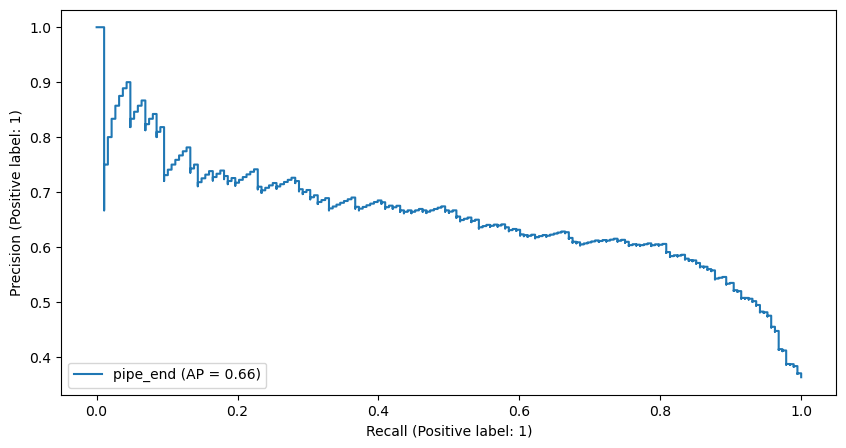

In [36]:
fig, ax_pr = plt.subplots(1,1, figsize=(10, 5))
PrecisionRecallDisplay.from_estimator(pipe_fin, X_test, y_test, ax = ax_pr, name = 'pipe_end');

In [37]:
print('Оценка на тренировочном наборе: ', pipe_fin.score(X_train,y_train))
print('Оценка на тестовом наборе: ', pipe_fin.score(X_test,y_test))

Оценка на тренировочном наборе:  0.7713338856669428
Оценка на тестовом наборе:  0.7239382239382239


## Наивный Байес 


In [38]:
pipe_nb = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

cv_nb = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
scaling_nb = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid_nb =[
    {'preprocessing': scaling_nb, 
     'clf': [GaussianNB()]}
    ]

grid_nb = GridSearchCV(pipe_nb, param_grid_nb, cv = cv_nb, return_train_score = True)
grid_nb.fit(X_train, y_train)
grid_nb 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [39]:
grid_result_nb = pd.DataFrame(grid_nb.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_nb

,0,1,2,3
mean_fit_time,0.00438,0.004726,0.007101,0.004565
std_fit_time,0.00029,0.000198,0.000504,0.000309
mean_score_time,0.002094,0.002248,0.002255,0.002344
std_score_time,0.000091,0.000048,0.000212,0.000169
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.716253,0.716253,0.716253,0.647383
split1_test_score,0.707989,0.707989,0.707989,0.639118
split2_test_score,0.749311,0.749311,0.749311,0.658402


In [40]:
print(grid_nb.best_estimator_)

Pipeline(steps=[('preprocessing', MinMaxScaler()), ('clf', GaussianNB())])


In [41]:
pipe_best_nb = Pipeline(steps=[('preprocessing', MinMaxScaler()), ('clf', GaussianNB())])
pipe_best_nb.fit(X_train,y_train)
y_pred_nb = pipe_best_nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))
print('recall:    ', recall_score(y_test, y_pred_nb))
print('precision: ', precision_score(y_test, y_pred_nb))
print('f1:        ', f1_score(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75       330
           1       0.58      0.77      0.66       188

    accuracy                           0.71       518
   macro avg       0.71      0.72      0.70       518
weighted avg       0.74      0.71      0.72       518

recall:     0.7712765957446809
precision:  0.5753968253968254
f1:         0.6590909090909091


In [42]:
pipe_best_nb.fit(X_train, y_train) 
y_scores = pipe_best_nb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)


idx = np.where(recall >= 0.4)[0]
threshold_optimal = thresholds[idx[np.argmax(precision[idx])]]
print(f"Optimal threshold: {threshold_optimal}")


y_pred_optimal = np.where(y_scores >= threshold_optimal, 1, 0)

precision_final = precision_score(y_test, y_pred_optimal)
recall_final = recall_score(y_test, y_pred_optimal)

print(f"Final Precision: {precision_final}")
print(f"Final Recall: {recall_final}")


Optimal threshold: 0.9002321056575694
Final Precision: 0.6967741935483871
Final Recall: 0.574468085106383
